# Bike Sharing Assignment

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../input/bike-sharing/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Data Analysis

### Univariate Analysis

**instant**: record index

This is just the index record so we can drop this columns as it is not useful for building model.

In [5]:
df.drop('instant', axis=1, inplace=True)

------------------

**dteday**: date

In [6]:
df.dteday.head()

0    01-01-2018
1    02-01-2018
2    03-01-2018
3    04-01-2018
4    05-01-2018
Name: dteday, dtype: object

The date is in string format. We will have to convert it into datetime format.

In [7]:
df['dteday'] = pd.to_datetime(df['dteday'], format='%d-%m-%Y')

In [8]:
df.dteday.head()

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: dteday, dtype: datetime64[ns]

---------------

**season**: season (1:spring, 2:summer, 3:fall, 4:winter)

Seasons are actually a categorical variable but in out dataset it is integer. So we will convert the data into categories.

In [9]:
num2season = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}

df['season'] = df['season'].replace(num2season)
df.season.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

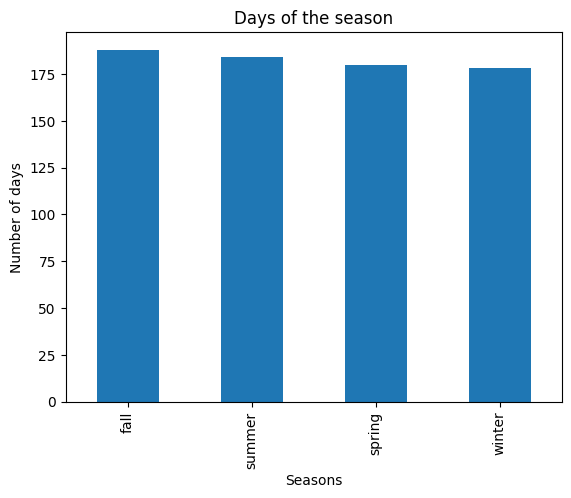

In [10]:
df.season.value_counts().plot.bar()
plt.title('Days of the season')
plt.xlabel('Seasons')
plt.ylabel('Number of days')
plt.show()

**yr**: year (0: 2018, 1:2019)

**mnth**: month ( 1 to 12)

In [11]:
import calendar

df['mnth'] = df['mnth'].apply(lambda x: calendar.month_name[x])

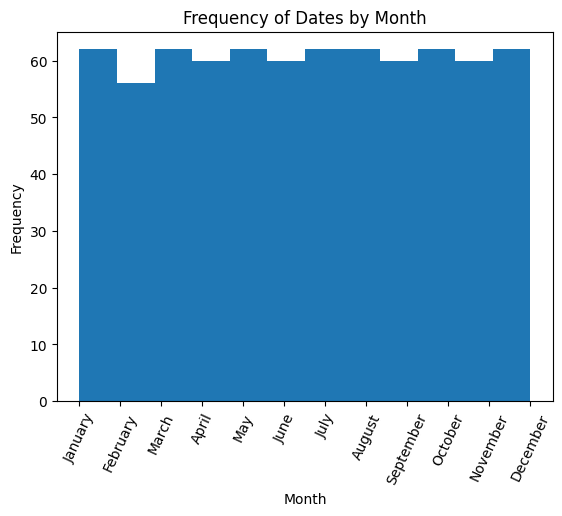

In [12]:
# Plotting the frequency of dates by month

plt.hist(df.mnth, bins=12)
plt.title('Frequency of Dates by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

Given that we have a data of 2 years. This values is looking correct.

-------

**holiday**: weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

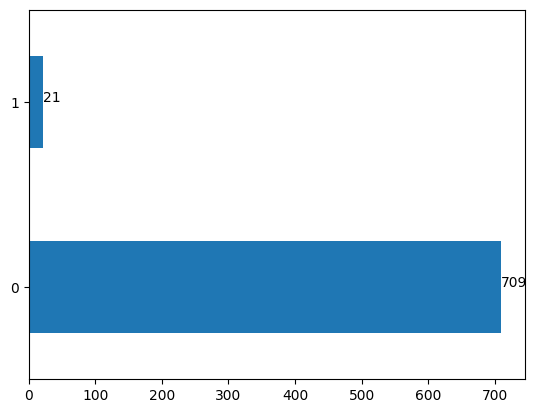

In [13]:
# count the values in column holiday
counts = df.holiday.value_counts()

# Create a horizontal bar plot of the counts
ax = counts.plot(kind='barh')

# show the values of the columns
for i, v in enumerate(counts):
    ax.text(v, i, str(v))

# show the plot
plt.show()

The data shows that there are total 21 holidays in 2 years.

--------

**weekday**: day of the week

In [14]:
df.weekday.head(10)

0    6
1    0
2    1
3    2
4    3
5    4
6    5
7    6
8    0
9    1
Name: weekday, dtype: int64

From the data we can see that values of the rows are corresponding the week days. So 1 will be monday, 2 tuesday and so on. For our analysis purpose we will convert this numerical values into categorical values.

In [15]:
num2day = {1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday', 0:'sunday'}

df['weekday'] = df['weekday'].replace(num2day)
df.weekday.head(10)

0     saturday
1       sunday
2       monday
3      tuesday
4    wednesday
5     thursday
6       friday
7     saturday
8       sunday
9       monday
Name: weekday, dtype: object

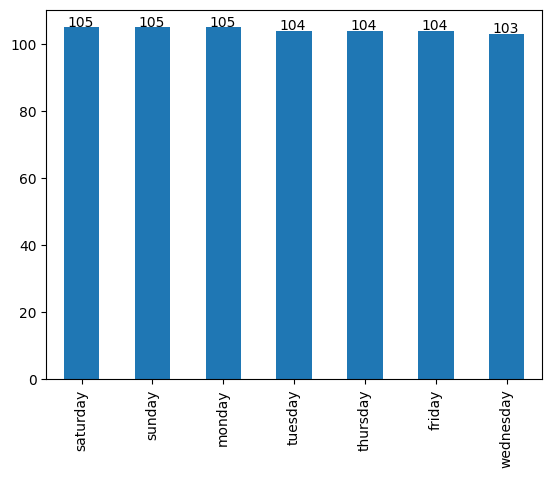

In [16]:
# count the values in column A
counts = df['weekday'].value_counts()

# create a bar plot of the counts
ax = counts.plot(kind='bar')

# show the values of the columns
for i, v in enumerate(counts):
    ax.text(i-0.2, v + 0.3, str(v))

# show the plot
plt.show()

The distribution to the days according to weekdays is good.

-----------

**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.

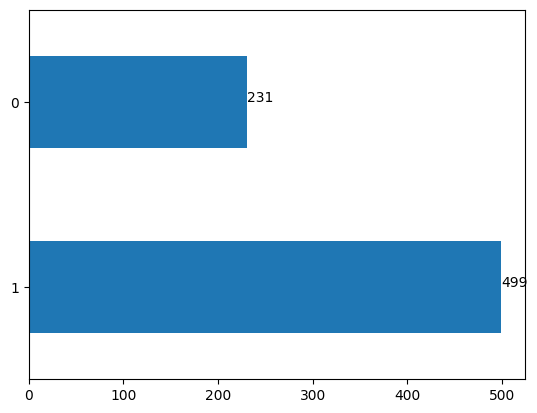

In [17]:
counts = df.workingday.value_counts()

ax = counts.plot(kind='barh')

for i, v in enumerate(counts):
    ax.text(v, i, str(v))
    
plt.show()

In two years there are total 504 working day and 226 day of either weekend or holidays.

-------

**weathersit**: 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [18]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [19]:
num2weather = {1:'clear', 2:'mist', 3:'light_snow', 4:'heavy_rain'}

df['weathersit'] = df['weathersit'].replace(num2weather)
df.weathersit.head()

0     mist
1     mist
2    clear
3    clear
4    clear
Name: weathersit, dtype: object

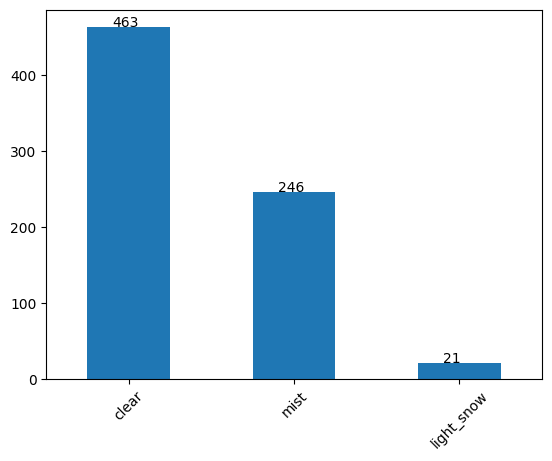

In [20]:
counts = df.weathersit.value_counts()

ax = counts.plot(kind='bar', rot=45)

for i, v in enumerate(counts):
    ax.text(i-0.1, v+0.8, str(v))
    
plt.show()

From the bar graph we can see that most of the day have clear weather or most and few clouds. Very few light snow days and no heavy rain at all.

------

**temp**: temperature in Celsius

In [21]:
df.temp.head()

0    14.110847
1    14.902598
2     8.050924
3     8.200000
4     9.305237
Name: temp, dtype: float64

In [22]:
df.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

<AxesSubplot: >

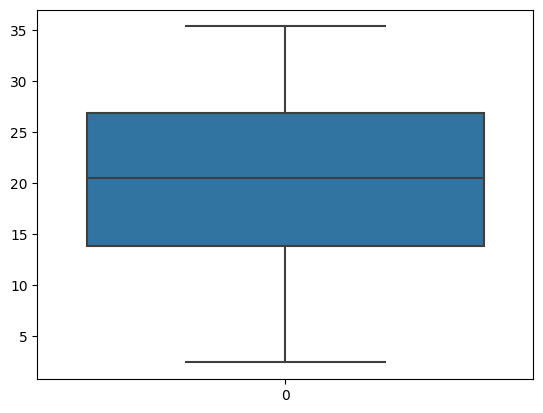

In [23]:
sns.boxplot(data=df.temp)

**atemp**: feeling temperature in Celsius

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64


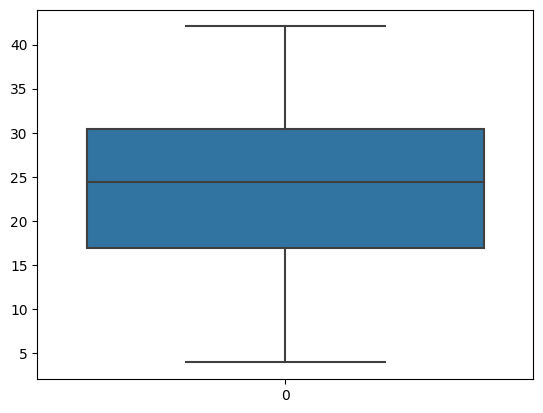

In [24]:
print(df.temp.describe())
sns.boxplot(data=df.atemp)

plt.show()

Statistics of **temp and atemp**

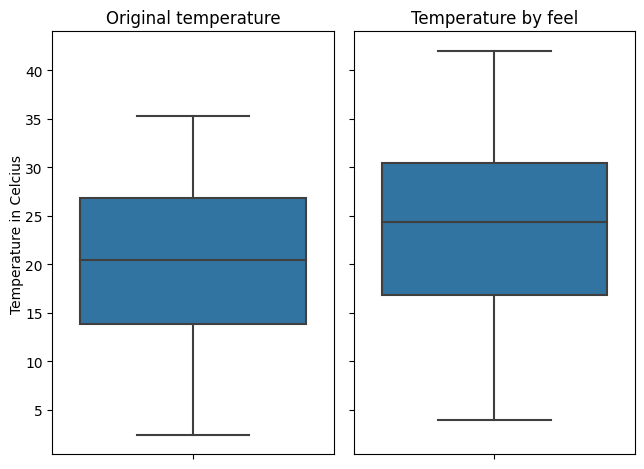

In [25]:
fig, axs = plt.subplots(1, 2, sharey=True)

sns.boxplot(y='temp', data=df, ax=axs[0])
axs[0].set_title("Original temperature")
axs[0].set_ylabel('')

sns.boxplot(y='atemp', data=df, ax=axs[1])
axs[1].set_title("Temperature by feel")
axs[1].set_ylabel('')

# add a y-axis label and adjust the spacing
fig.text(0, 0.5, "Temperature in Celcius", va="center", rotation="vertical")
fig.tight_layout()

fig.tight_layout()
plt.show()

From the box we can make the conclusion that it always feel bit more hotter than the actual temperature.

-----------

**hum**: humidity

In [26]:
df.hum.head()

0    80.5833
1    69.6087
2    43.7273
3    59.0435
4    43.6957
Name: hum, dtype: float64

<AxesSubplot: >

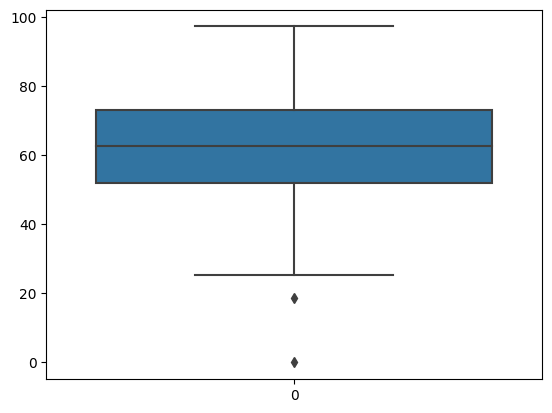

In [27]:
sns.boxplot(df.hum)

From the box plot we can see that we have two outliers in that data. We will keep them as they might be important data points.

------

**windspeed**: wind speed

In [28]:
df.windspeed.head()

0    10.749882
1    16.652113
2    16.636703
3    10.739832
4    12.522300
Name: windspeed, dtype: float64

<AxesSubplot: >

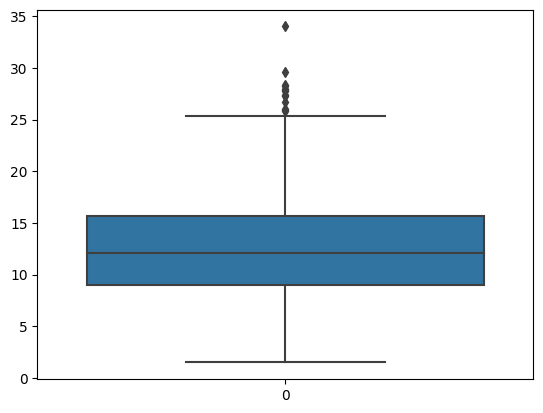

In [29]:
sns.boxplot(df.windspeed)

The data of windspeed is nicely distributed with few outliers.

----------

**casual**: count of casual users

<AxesSubplot: >

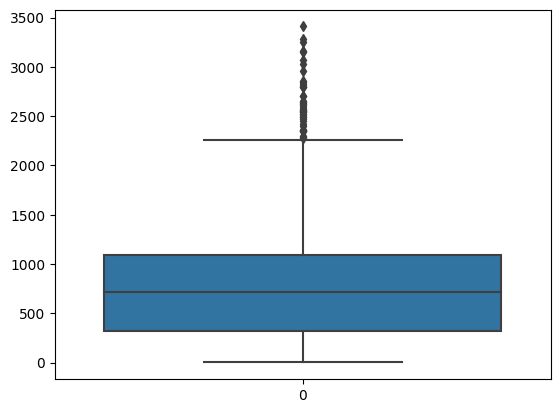

In [30]:
sns.boxplot(df.casual)

**registered**: count of registered users

<AxesSubplot: >

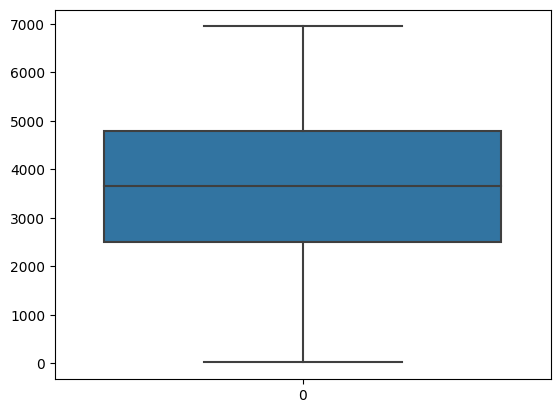

In [31]:
sns.boxplot(df.registered)

**cnt**: count of total rental bikes including both casual and registered

<AxesSubplot: >

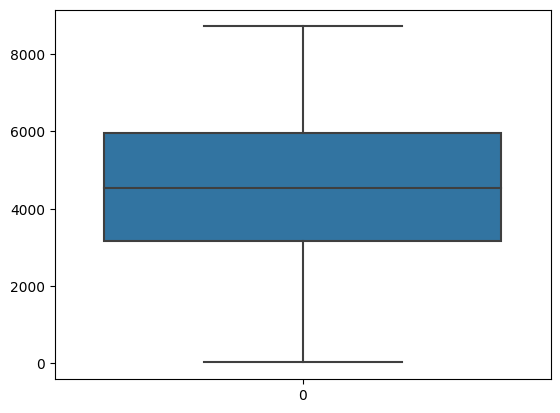

In [32]:
sns.boxplot(df.cnt)

### Bivariate Analysis

In [33]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,January,0,saturday,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,spring,0,January,0,sunday,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,spring,0,January,0,monday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,spring,0,January,0,tuesday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,spring,0,January,0,wednesday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [34]:
df.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,2019-12-27,spring,1,December,0,thursday,1,mist,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,2019-12-28,spring,1,December,0,friday,1,mist,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,2019-12-29,spring,1,December,0,saturday,0,mist,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,2019-12-30,spring,1,December,0,sunday,0,clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,2019-12-31,spring,1,December,0,monday,1,mist,8.849153,11.17435,57.7500,10.374682,439,2290,2729


**dteday vs cnt**

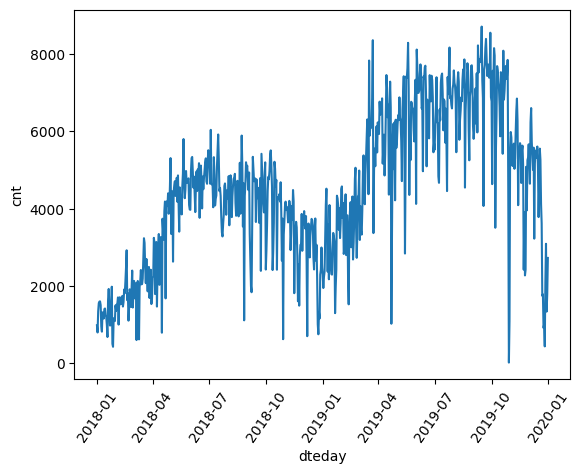

In [35]:
sns.lineplot(data=df, x='dteday', y='cnt')
plt.xticks(rotation=55)
plt.show()

From the line plot we can see that count of the rental bike started increasing from January 18 and decreased around end of 2018. But it started increasing from same time and was at pick from April to October. And decrease again in end of 2019.

**season vs cnt**

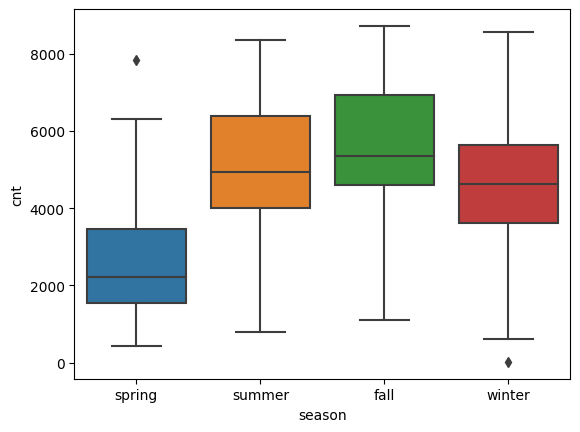

In [36]:
sns.boxplot(data=df, x='season', y='cnt')
plt.show()

From the boxplot it occurs that fall season have the highest bike rentals while spring season have the lowest bike rentals.

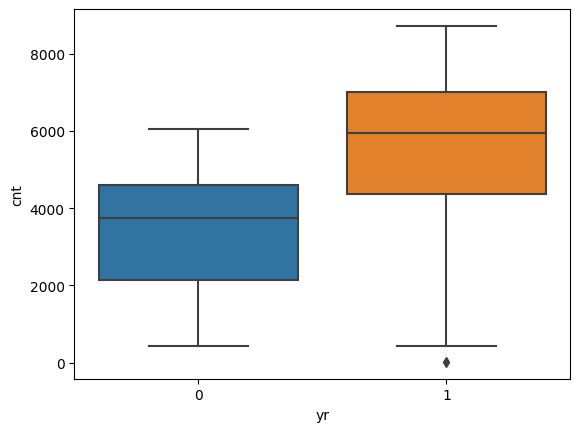

In [37]:
sns.boxplot(data=df, x='yr', y='cnt')
plt.show()

There is a increase in bike rental in second year (2019).

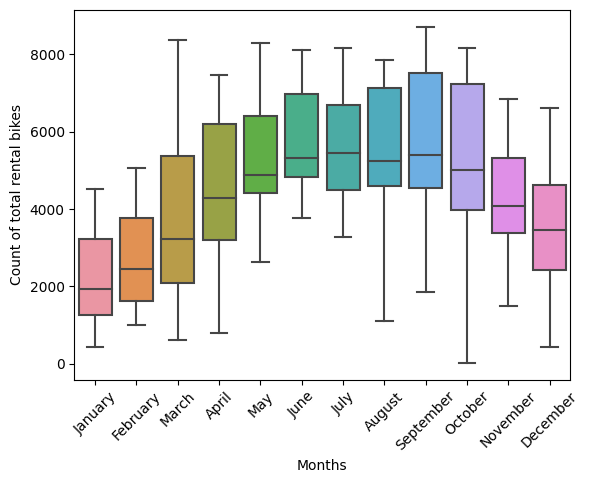

In [38]:
sns.boxplot(data=df, x='mnth', y='cnt')
plt.xticks(rotation=45)
plt.ylabel('Count of total rental bikes')
plt.xlabel('Months')
plt.show()

The rentals are high from june to october.

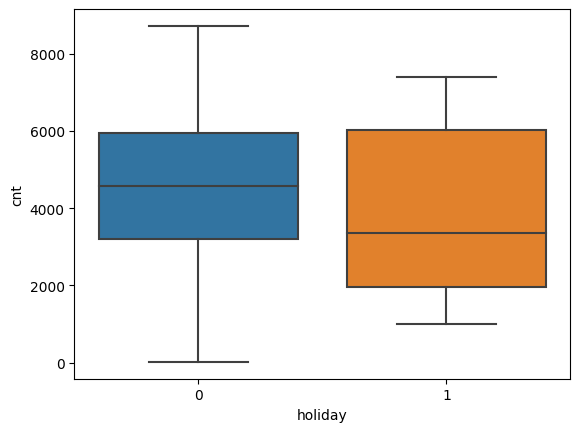

In [39]:
sns.boxplot(data=df, x='holiday', y='cnt')
plt.show()

The rental of bikes are bit higher when it's not holiday.

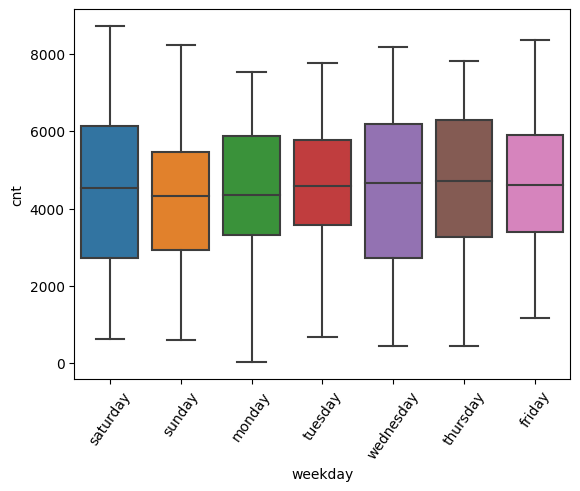

In [40]:
sns.boxplot(data=df, x='weekday', y='cnt')
plt.xticks(rotation=55)
plt.show()

Even though the median is highest for thursday, it is very close to all other days. And the difference between the median of all days is very less. Therefore it's very hard to reach any conclusion for this plot.

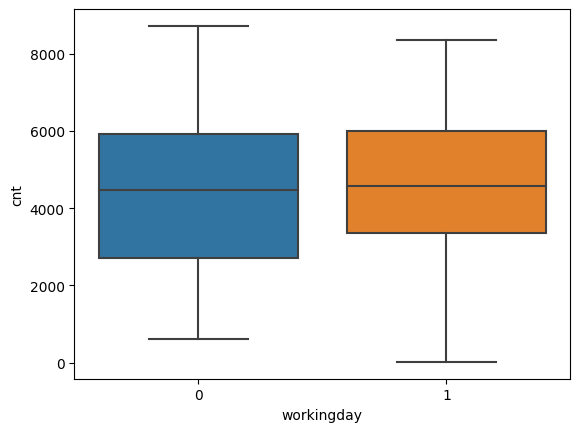

In [41]:
sns.boxplot(data=df, x='workingday', y='cnt')
plt.show()

There is not difference between the rental days whether it's working day or not.

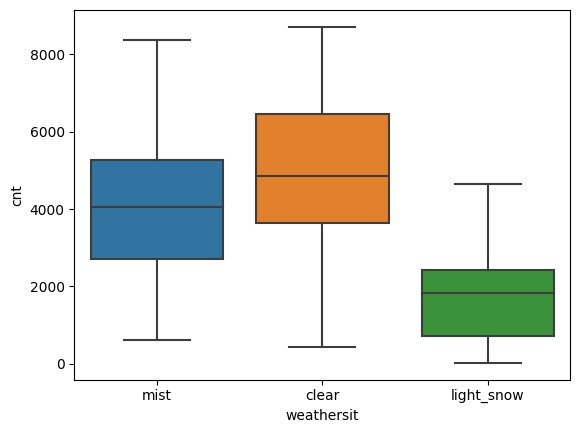

In [42]:
sns.boxplot(data=df, x='weathersit', y='cnt')
plt.show()

The rental of bikes are higher when the weather is clear.

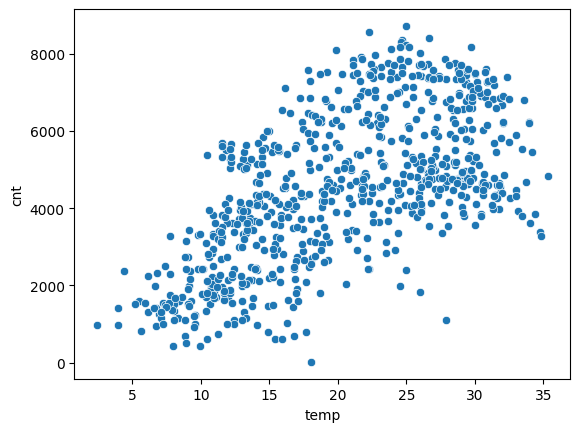

In [43]:
sns.scatterplot(data=df, x='temp', y='cnt')
plt.show()

From the plot it can be seen that there is some linear relation between bike rental and temperature.

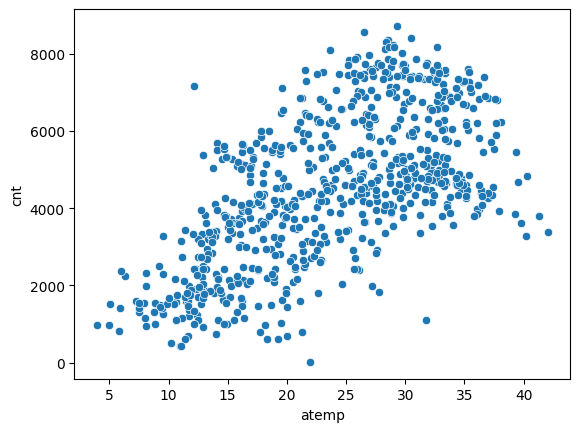

In [44]:
sns.scatterplot(data=df, x='atemp', y='cnt')
plt.show()

There is a linear relation between bike rental and feeling temperature.

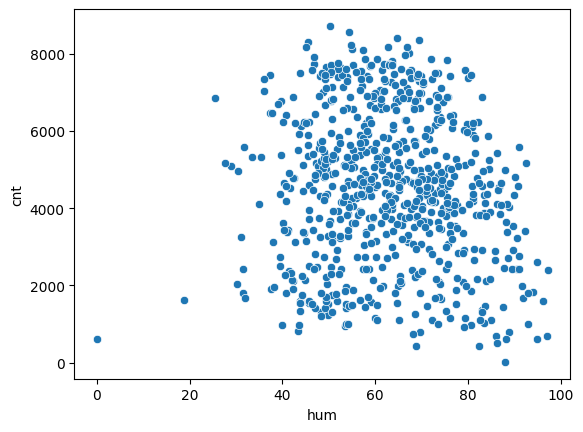

In [45]:
sns.scatterplot(data=df, x='hum', y='cnt')
plt.show()

The data is not uniformly spread between humidity and bike rental.

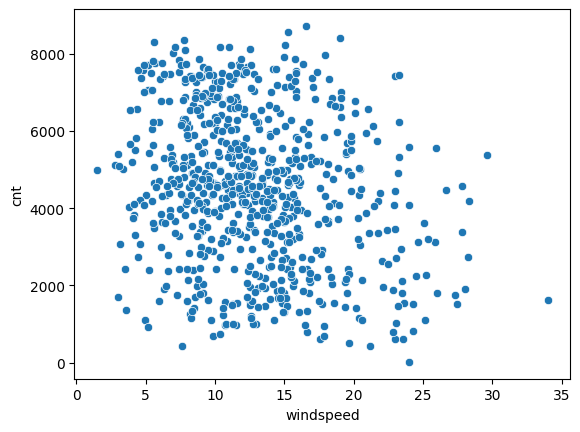

In [46]:
sns.scatterplot(data=df, x='windspeed', y='cnt')
plt.show()

The relation between wind speed and bike rental count is not clear.

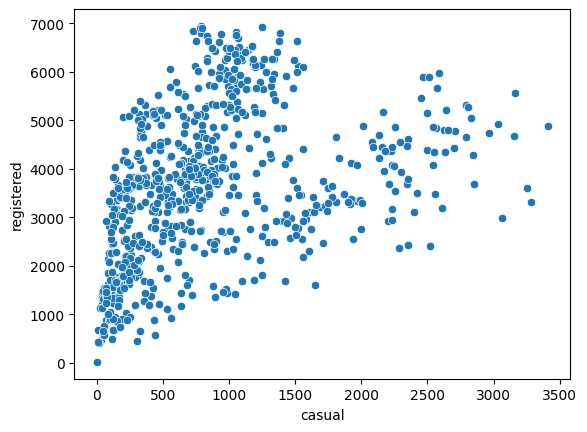

In [47]:
sns.scatterplot(data=df, x='casual', y='registered')
plt.show()

There is clear linear relation between registered user and casual registered.

### Multivariate Analysis

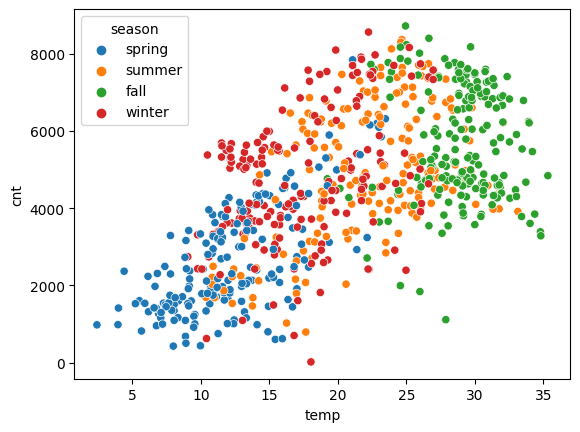

In [48]:
sns.scatterplot(data=df, x='temp', y='cnt', hue='season')
plt.show()

Temperature is lowest in spring season then it rises in winter. The temperature is higher in summer than winter and the highest in fall. The bike rental increases accordingly.

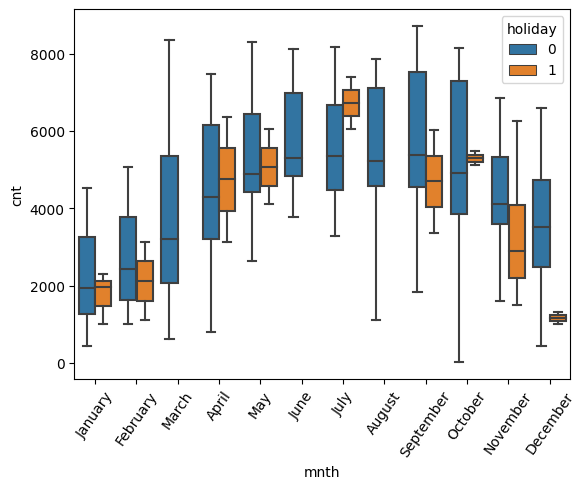

In [49]:
sns.boxplot(data=df, x='mnth', y='cnt', hue='holiday')
plt.xticks(rotation=55)
plt.show()

The bike rental in month of july is higher on holidays. In all other months bike rental are lower in holidays.

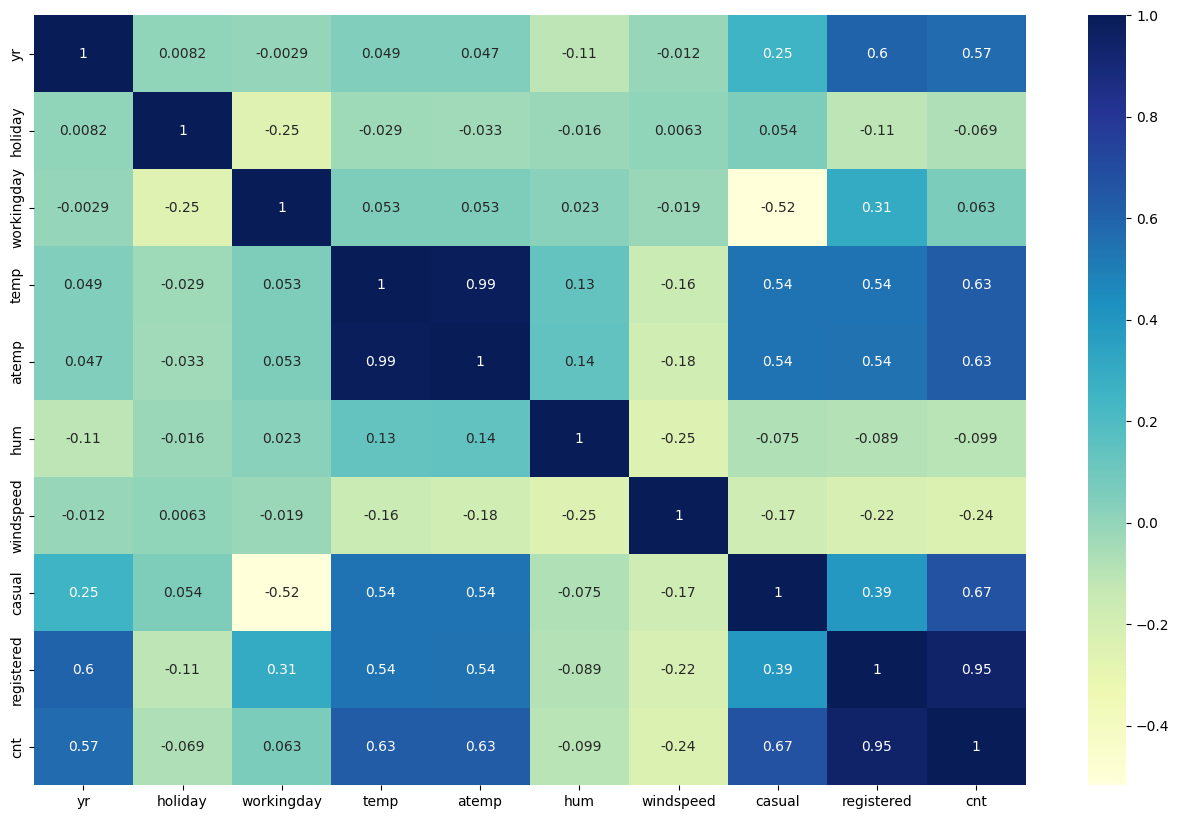

In [50]:
corr = df.corr()
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap="YlGnBu")
plt.show()

## Data Preparation

### Adding dummies

In [51]:
months = pd.get_dummies(df['mnth'], drop_first=True)
season = pd.get_dummies(df['season'], drop_first=True)
weekday = pd.get_dummies(df['weekday'], drop_first=True)
weathersit = pd.get_dummies(df['weathersit'], drop_first=True)

print('Months dataframe: \n', months.head())
print('Season dataframe: \n', season.head())
print('Weekday dataframe: \n', weekday.head())
print('Weathersit dataframe: \n', weathersit.head())

Months dataframe: 
    August  December  February  January  July  June  March  May  November  \
0       0         0         0        1     0     0      0    0         0   
1       0         0         0        1     0     0      0    0         0   
2       0         0         0        1     0     0      0    0         0   
3       0         0         0        1     0     0      0    0         0   
4       0         0         0        1     0     0      0    0         0   

   October  September  
0        0          0  
1        0          0  
2        0          0  
3        0          0  
4        0          0  
Season dataframe: 
    spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
Weekday dataframe: 
    monday  saturday  sunday  thursday  tuesday  wednesday
0       0         1       0         0        0          0
1       0         0       1         0        0          0
2       

In [52]:
df = pd.concat([df, months], axis = 1)
df.drop(['mnth'], axis = 1, inplace = True)

df = pd.concat([df, season], axis = 1)
df.drop(['season'], axis = 1, inplace = True)

df = pd.concat([df, weekday], axis = 1)
df.drop(['weekday'], axis = 1, inplace = True)

df = pd.concat([df, weathersit], axis = 1)
df.drop(['weathersit'], axis = 1, inplace = True)

In [53]:
df.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'spring', 'summer', 'winter', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednesday', 'light_snow',
       'mist'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   yr          730 non-null    int64         
 2   holiday     730 non-null    int64         
 3   workingday  730 non-null    int64         
 4   temp        730 non-null    float64       
 5   atemp       730 non-null    float64       
 6   hum         730 non-null    float64       
 7   windspeed   730 non-null    float64       
 8   casual      730 non-null    int64         
 9   registered  730 non-null    int64         
 10  cnt         730 non-null    int64         
 11  August      730 non-null    uint8         
 12  December    730 non-null    uint8         
 13  February    730 non-null    uint8         
 14  January     730 non-null    uint8         
 15  July        730 non-null    uint8         
 16  June        730 non-null  

In [55]:
df.drop(['dteday'], axis = 1, inplace = True)

In [56]:
df.drop(['casual', 'registered'], axis = 1, inplace = True)

### Splitting the data

In [57]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)
print(df_train.shape, df_test.shape)

(511, 30) (219, 30)


In [58]:
df_train.describe().columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September', 'spring', 'summer',
       'winter', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'light_snow', 'mist'],
      dtype='object')

### Rescaling the features

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [60]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

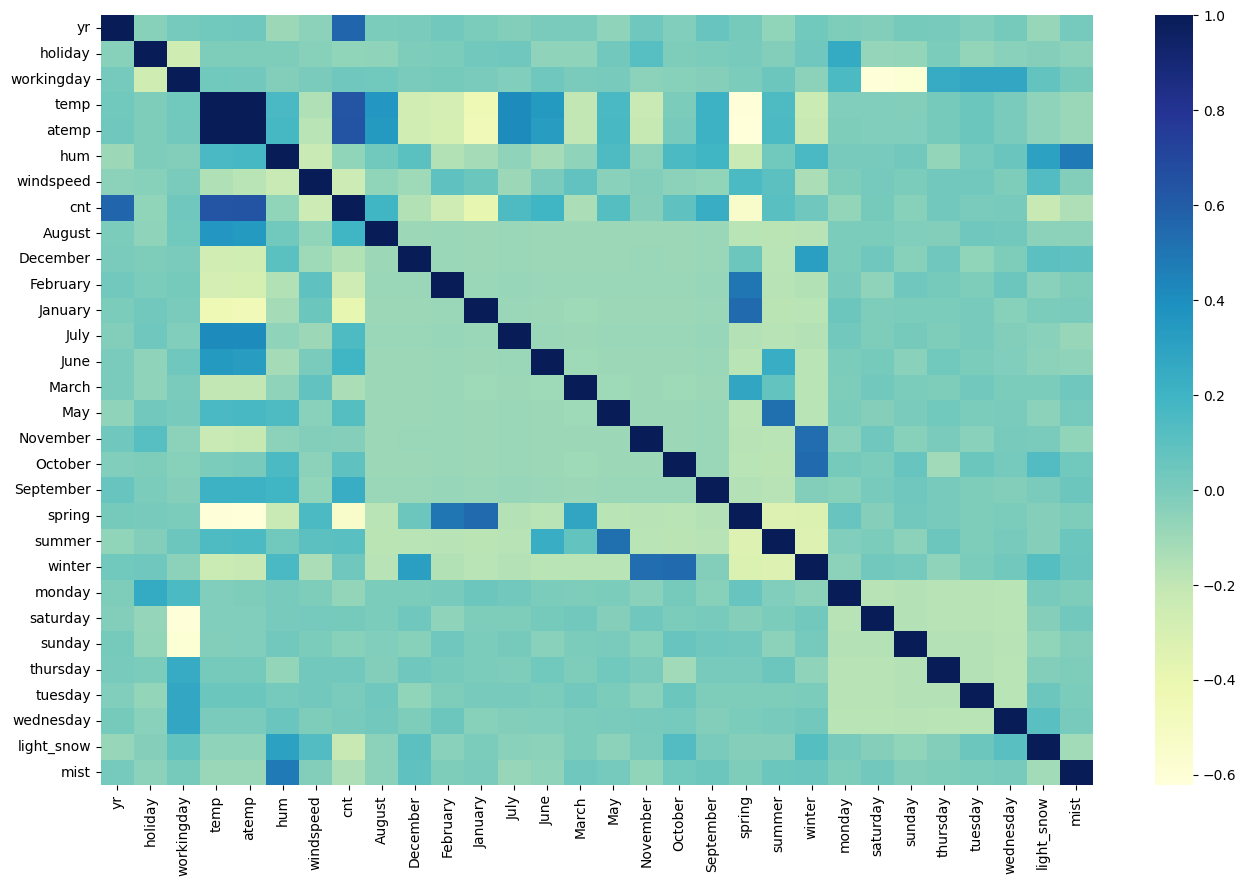

In [61]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), cmap="YlGnBu")
plt.show()

### Dividing X and y set for model building

In [62]:
y_train = df_train.pop('cnt')
X_train = df_train

In [63]:
X_train.shape

(511, 29)

In [64]:
y_train.shape

(511,)

## Building a linear model

### First Model

#### RFE

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [66]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('August', False, 15),
 ('December', False, 2),
 ('February', False, 4),
 ('January', False, 3),
 ('July', True, 1),
 ('June', False, 9),
 ('March', False, 11),
 ('May', False, 5),
 ('November', True, 1),
 ('October', False, 10),
 ('September', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', True, 1),
 ('monday', False, 7),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 13),
 ('tuesday', False, 8),
 ('wednesday', False, 12),
 ('light_snow', True, 1),
 ('mist', False, 6)]

In [68]:
# The variables supported by the rfe are
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'July', 'November', 'September', 'spring', 'winter', 'saturday',
       'sunday', 'light_snow'],
      dtype='object')

In [69]:
# The variables not supported by rfe
X_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'January', 'June', 'March', 'May',
       'October', 'summer', 'monday', 'thursday', 'tuesday', 'wednesday',
       'mist'],
      dtype='object')

#### Building a model using statsmodel for detailed statistics

In [70]:
# Creating a X_train dataset using the variables supported by rfe
X_train = X_train[col]

In [71]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

In [72]:
lm = sm.OLS(y_train, X_train).fit()

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     161.4
Date:                Sat, 13 May 2023   Prob (F-statistic):          2.26e-174
Time:                        15:21:05   Log-Likelihood:                 494.42
No. Observations:                 511   AIC:                            -958.8
Df Residuals:                     496   BIC:                            -895.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2469      0.023     10.777      0.0

#### Checking VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [75]:
get_vif(X_train)

,Features,VIF
2,holiday,inf
3,workingday,inf
13,saturday,inf
14,sunday,inf
5,atemp,182.96
4,temp,182.50
11,spring,2.67
12,winter,2.09
9,November,1.51
6,hum,1.36


### Second Model

The VIF of atemp is too high. Therefore we will remove this variable from the model.

In [76]:
X_train.drop('atemp', axis=1, inplace=True)

In [77]:
X_train.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'July', 'November', 'September', 'spring', 'winter', 'saturday',
       'sunday', 'light_snow'],
      dtype='object')

In [78]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     170.1
Date:                Sat, 13 May 2023   Prob (F-statistic):          1.95e-173
Time:                        15:21:06   Log-Likelihood:                 489.50
No. Observations:                 511   AIC:                            -951.0
Df Residuals:                     497   BIC:                            -891.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2685      0.022     12.199      0.000       0.225       0.312
yr             0.2185      0.008     25.707      0.000       0.202       0.235
holiday        0.0292      0.021      1.410      0.159      -0.011       0.070
workingday     0.0848      0.009      9.699      0.000       0.068       0.102
temp           0.4577      0.030     15.370      0.000       0.399       0.516
hum           -0.2026      0.025     -8.177      0.000      -0.251      -0.154
windspeed     -0.1407      0.023     -6.031      0.000      -0.187      -0.095
July          -0.0775      0.018     -4.332      0.000      -0.113      -0.042
November      -0.0399      0.019     -2.144      0.032      -0.077      -0.003
September      0.0595      0.017      3.584      0.000       0.027       0.092
spring        -0.1195      0.016     -7.559      0.000      -0.151      -0.088
winter         0.0574      0.014      4.093      0.000       0.030       0.085
saturday       0.0934      0.012      8.096      0.000       0.071       0.116
sunday         0.0611      0.012      5.105      0.000       0.038       0.085
light_snow    -0.1591      0.030     -5.296      0.000      -0.218      -0.100
==============================================================================
Omnibus:                       64.403   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.579
Skew:                          -0.697   Prob(JB):                     8.09e-31
Kurtosis:                       5.136   Cond. No.                     1.91e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.7e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Checking VIF

In [79]:
get_vif(X_train)

,Features,VIF
2,holiday,inf
3,workingday,inf
12,saturday,inf
13,sunday,inf
4,temp,3.01
10,spring,2.66
11,winter,2.07
8,November,1.51
5,hum,1.34
7,July,1.30


### Third Model

The coefficent of 'holiday' is very less. Therefore, we will drop this column.

In [80]:
X_train.drop('holiday', axis=1, inplace=True)

In [81]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     170.1
Date:                Sat, 13 May 2023   Prob (F-statistic):          1.95e-173
Time:                        15:21:06   Log-Likelihood:                 489.50
No. Observations:                 511   AIC:                            -951.0
Df Residuals:                     497   BIC:                            -891.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2977      0.036      8.200      0.000       0.226       0.369
yr             0.2185      0.008     25.707      0.000       0.202       0.235
workingday     0.0557      0.025      2.218      0.027       0.006       0.105
temp           0.4577      0.030     15.370      0.000       0.399       0.516
hum           -0.2026      0.025     -8.177      0.000      -0.251      -0.154
windspeed     -0.1407      0.023     -6.031      0.000      -0.187      -0.095
July          -0.0775      0.018     -4.332      0.000      -0.113      -0.042
November      -0.0399      0.019     -2.144      0.032      -0.077      -0.003
September      0.0595      0.017      3.584      0.000       0.027       0.092
spring        -0.1195      0.016     -7.559      0.000      -0.151      -0.088
winter         0.0574      0.014      4.093      0.000       0.030       0.085
saturday       0.0642      0.027      2.390      0.017       0.011       0.117
sunday         0.0320      0.027      1.180      0.239      -0.021       0.085
light_snow    -0.1591      0.030     -5.296      0.000      -0.218      -0.100
==============================================================================
Omnibus:                       64.403   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.579
Skew:                          -0.697   Prob(JB):                     8.09e-31
Kurtosis:                       5.136   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Fourth Model

The coefficient of September is very low. Therefore, we will drop this variable.

In [82]:
X_train.drop('September', axis=1, inplace=True)

In [83]:
X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     178.9
Date:                Sat, 13 May 2023   Prob (F-statistic):          7.84e-172
Time:                        15:21:07   Log-Likelihood:                 482.98
No. Observations:                 511   AIC:                            -940.0
Df Residuals:                     498   BIC:                            -884.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2898      0.037      7.904      0.000       0.218       0.362
yr             0.2206      0.009     25.724      0.000       0.204       0.238
workingday     0.0541      0.025      2.132      0.034       0.004       0.104
temp           0.4724      0.030     15.829      0.000       0.414       0.531
hum           -0.1904      0.025     -7.667      0.000      -0.239      -0.142
windspeed     -0.1404      0.024     -5.948      0.000      -0.187      -0.094
July          -0.0882      0.018     -4.943      0.000      -0.123      -0.053
November      -0.0427      0.019     -2.268      0.024      -0.080      -0.006
spring        -0.1208      0.016     -7.553      0.000      -0.152      -0.089
winter         0.0570      0.014      4.022      0.000       0.029       0.085
saturday       0.0635      0.027      2.334      0.020       0.010       0.117
sunday         0.0324      0.027      1.180      0.238      -0.022       0.086
light_snow    -0.1622      0.030     -5.337      0.000      -0.222      -0.102
==============================================================================
Omnibus:                       60.346   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.338
Skew:                          -0.651   Prob(JB):                     1.83e-29
Kurtosis:                       5.126   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
get_vif(X_train)

,Features,VIF
0,const,75.72
2,workingday,7.76
10,saturday,5.16
11,sunday,4.95
3,temp,2.95
8,spring,2.66
9,winter,2.07
7,November,1.51
4,hum,1.31
6,July,1.26


### Fifth Model

In [85]:
X_train.drop('workingday', axis=1, inplace=True)

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     193.4
Date:                Sat, 13 May 2023   Prob (F-statistic):          5.23e-172
Time:                        15:21:07   Log-Likelihood:                 480.66
No. Observations:                 511   AIC:                            -937.3
Df Residuals:                     499   BIC:                            -886.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3428      0.027     12.683      0.000       0.290       0.396
yr             0.2215      0.009     25.760      0.000       0.205       0.238
temp           0.4707      0.030     15.722      0.000       0.412       0.530
hum           -0.1908      0.025     -7.658      0.000      -0.240      -0.142
windspeed     -0.1392      0.024     -5.879      0.000      -0.186      -0.093
July          -0.0896      0.018     -5.006      0.000      -0.125      -0.054
November      -0.0474      0.019     -2.526      0.012      -0.084      -0.011
spring        -0.1224      0.016     -7.634      0.000      -0.154      -0.091
winter         0.0568      0.014      3.995      0.000       0.029       0.085
saturday       0.0116      0.012      0.952      0.342      -0.012       0.036
sunday        -0.0196      0.013     -1.551      0.122      -0.044       0.005
light_snow    -0.1602      0.030     -5.256      0.000      -0.220      -0.100
==============================================================================
Omnibus:                       64.752   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.507
Skew:                          -0.693   Prob(JB):                     1.14e-31
Kurtosis:                       5.184   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
get_vif(X_train)

,Features,VIF
0,const,40.86
2,temp,2.95
7,spring,2.66
8,winter,2.07
6,November,1.49
3,hum,1.31
5,July,1.26
11,light_snow,1.19
4,windspeed,1.16
10,sunday,1.04


### Sixth Model

In [87]:
X_train.drop('saturday', axis=1, inplace=True)

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     212.7
Date:                Sat, 13 May 2023   Prob (F-statistic):          5.49e-173
Time:                        15:21:08   Log-Likelihood:                 480.20
No. Observations:                 511   AIC:                            -938.4
Df Residuals:                     500   BIC:                            -891.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3447      0.027     12.789      0.000       0.292       0.398
yr             0.2214      0.009     25.750      0.000       0.204       0.238
temp           0.4699      0.030     15.703      0.000       0.411       0.529
hum           -0.1900      0.025     -7.633      0.000      -0.239      -0.141
windspeed     -0.1385      0.024     -5.851      0.000      -0.185      -0.092
July          -0.0895      0.018     -5.002      0.000      -0.125      -0.054
November      -0.0472      0.019     -2.514      0.012      -0.084      -0.010
spring        -0.1228      0.016     -7.665      0.000      -0.154      -0.091
winter         0.0569      0.014      3.998      0.000       0.029       0.085
sunday        -0.0216      0.012     -1.732      0.084      -0.046       0.003
light_snow    -0.1618      0.030     -5.316      0.000      -0.222      -0.102
==============================================================================
Omnibus:                       62.095   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.080
Skew:                          -0.656   Prob(JB):                     2.32e-31
Kurtosis:                       5.214   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
get_vif(X_train)

,Features,VIF
0,const,40.64
2,temp,2.95
7,spring,2.65
8,winter,2.07
6,November,1.49
3,hum,1.31
5,July,1.26
10,light_snow,1.19
4,windspeed,1.16
1,yr,1.03


### Seventh Model

In [89]:
X_train.drop('November', axis=1, inplace=True)

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     233.2
Date:                Sat, 13 May 2023   Prob (F-statistic):          7.97e-173
Time:                        15:21:08   Log-Likelihood:                 476.99
No. Observations:                 511   AIC:                            -934.0
Df Residuals:                     501   BIC:                            -891.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3330      0.027     12.477      0.000       0.281       0.385
yr             0.2206      0.009     25.541      0.000       0.204       0.238
temp           0.4830      0.030     16.307      0.000       0.425       0.541
hum           -0.1831      0.025     -7.360      0.000      -0.232      -0.134
windspeed     -0.1396      0.024     -5.869      0.000      -0.186      -0.093
July          -0.0919      0.018     -5.121      0.000      -0.127      -0.057
spring        -0.1169      0.016     -7.336      0.000      -0.148      -0.086
winter         0.0435      0.013      3.279      0.001       0.017       0.070
sunday        -0.0199      0.012     -1.593      0.112      -0.044       0.005
light_snow    -0.1582      0.031     -5.178      0.000      -0.218      -0.098
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.144
Skew:                          -0.663   Prob(JB):                     5.01e-32
Kurtosis:                       5.239   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Eighth Model

In [90]:
X_train.drop('sunday', axis=1, inplace=True)

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     261.2
Date:                Sat, 13 May 2023   Prob (F-statistic):          1.69e-173
Time:                        15:21:08   Log-Likelihood:                 475.70
No. Observations:                 511   AIC:                            -933.4
Df Residuals:                     502   BIC:                            -895.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3322      0.027     12.430      0.000       0.280       0.385
yr             0.2204      0.009     25.481      0.000       0.203       0.237
temp           0.4831      0.030     16.285      0.000       0.425       0.541
hum           -0.1854      0.025     -7.452      0.000      -0.234      -0.136
windspeed     -0.1404      0.024     -5.895      0.000      -0.187      -0.094
July          -0.0928      0.018     -5.166      0.000      -0.128      -0.058
spring        -0.1178      0.016     -7.383      0.000      -0.149      -0.086
winter         0.0428      0.013      3.223      0.001       0.017       0.069
light_snow    -0.1544      0.031     -5.061      0.000      -0.214      -0.094
==============================================================================
Omnibus:                       62.508   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.844
Skew:                          -0.663   Prob(JB):                     2.61e-31
Kurtosis:                       5.204   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ninth Model

In [91]:
X_train.drop('July', axis=1, inplace=True)

X_train = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     280.4
Date:                Sat, 13 May 2023   Prob (F-statistic):          4.14e-169
Time:                        15:21:09   Log-Likelihood:                 462.46
No. Observations:                 511   AIC:                            -908.9
Df Residuals:                     503   BIC:                            -875.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3409      0.027     12.470      0.000       0.287       0.395
yr             0.2232      0.009     25.230      0.000       0.206       0.241
temp           0.4300      0.029     15.072      0.000       0.374       0.486
hum           -0.1677      0.025     -6.639      0.000      -0.217      -0.118
windspeed     -0.1313      0.024     -5.393      0.000      -0.179      -0.083
spring        -0.1261      0.016     -7.749      0.000      -0.158      -0.094
winter         0.0417      0.014      3.064      0.002       0.015       0.068
light_snow    -0.1596      0.031     -5.104      0.000      -0.221      -0.098
==============================================================================
Omnibus:                       62.412   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.273
Skew:                          -0.654   Prob(JB):                     4.69e-32
Kurtosis:                       5.251   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
get_vif(X_train)

,Features,VIF
0,const,39.24
5,spring,2.57
2,temp,2.52
6,winter,1.78
3,hum,1.27
7,light_snow,1.18
4,windspeed,1.15
1,yr,1.03


## Residual Analysis of train data

In [93]:
y_train_cnt = lm.predict(X_train)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

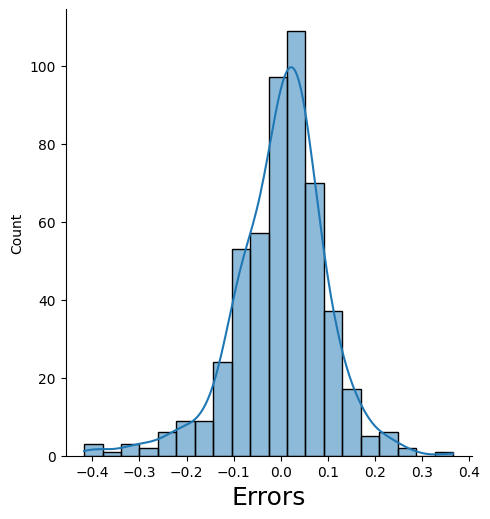

In [94]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.displot((y_train - y_train_cnt), bins = 20, kde=True)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Prediction and Evaluation on Test Data

### Applying scaling on the test set

In [95]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing Test Set

In [96]:
y_test = df_test.pop('cnt')
X_test = df_test

In [97]:
X_train.drop('const', axis=1, inplace=True)

In [98]:
X_test = X_test[X_train.columns]

In [99]:
X_test = sm.add_constant(X_test)

In [100]:
y_pred = lm.predict(X_test)

## Model Evaluation

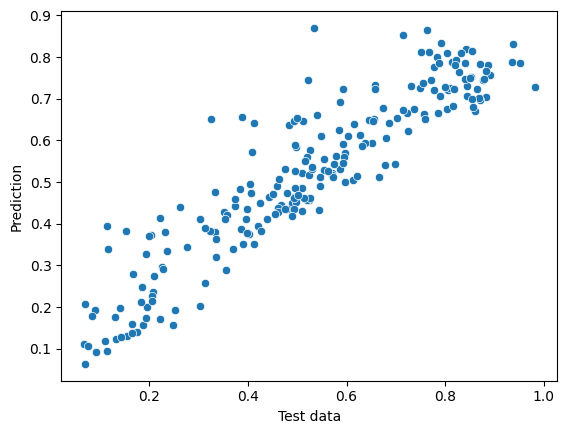

In [101]:
sns.scatterplot(x = y_test,y = y_pred)
plt.xlabel('Test data')
plt.ylabel('Prediction')
plt.show()

In [102]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_pred)

0.833078572253958